In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
#load the data
data = pd.read_csv('/Users/cmoradajr/Downloads/winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#descriptive statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#Assigning the variables

X = data.drop('quality', axis=1)
y = data['quality']

In [10]:
# Stanrdize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# PCA
pca_full = PCA()
pca_full.fit_transform(X_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print('Explained variance ratio:', explained_variance_ratio)
print('Cumulative variance:', cumulative_variance)



Explained variance ratio: [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]
Cumulative variance: [0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


In [20]:
#number of componets to retain 90% variance:

num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print('Number of components to retain 90% variance:', num_components_90)

Number of components to retain 90% variance: 7


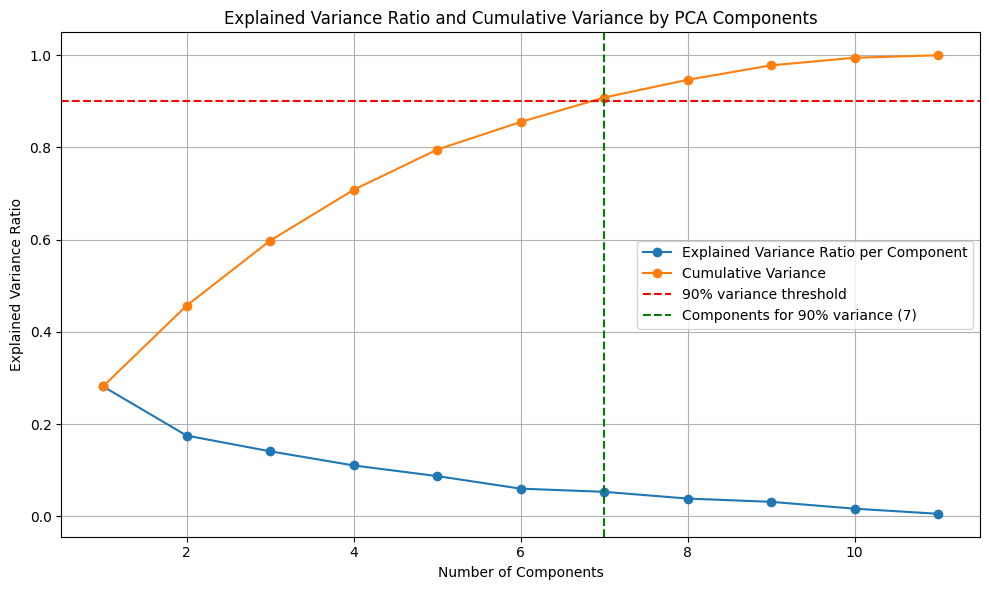

In [21]:
# Plot explained variance ratio and cumulative variance

components = np.arange(1, len(explained_variance_ratio) + 1)
plt.figure(figsize=(10, 6))
plt.plot(components, explained_variance_ratio, marker='o', label='Explained Variance Ratio per Component')
plt.plot(components, cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance threshold')
plt.axvline(x=num_components_90, color='g', linestyle='--', label=f'Components for 90% variance ({num_components_90})')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Variance by PCA Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
#2D Scatter plot of the first two principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

In [23]:
#2nd PCA with 2 components
pca_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_df['quality'] = y.values

In [27]:
#categorise qualioty

bins = [2, 4, 6, 8]
labels = ['Low', 'Medium', 'High']
pca_df['quality_category'] = pd.cut(pca_df['quality'], bins=bins, labels=labels)


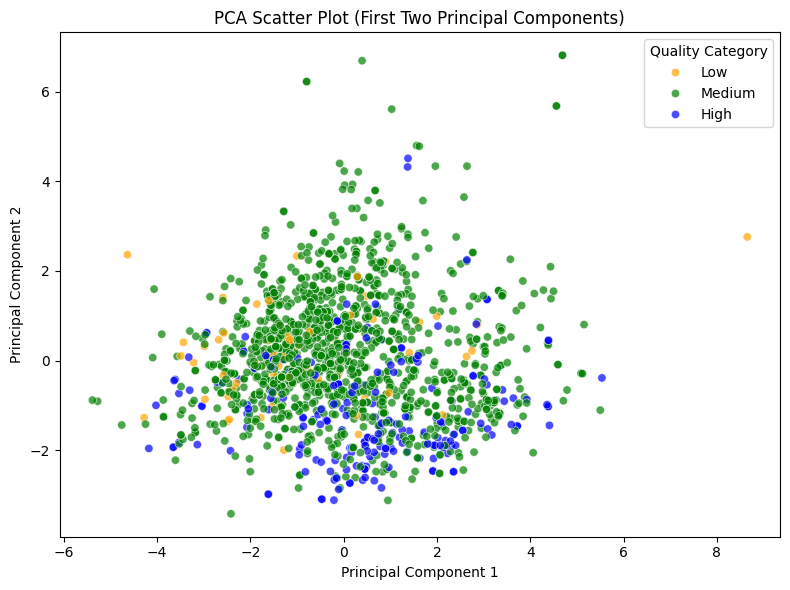

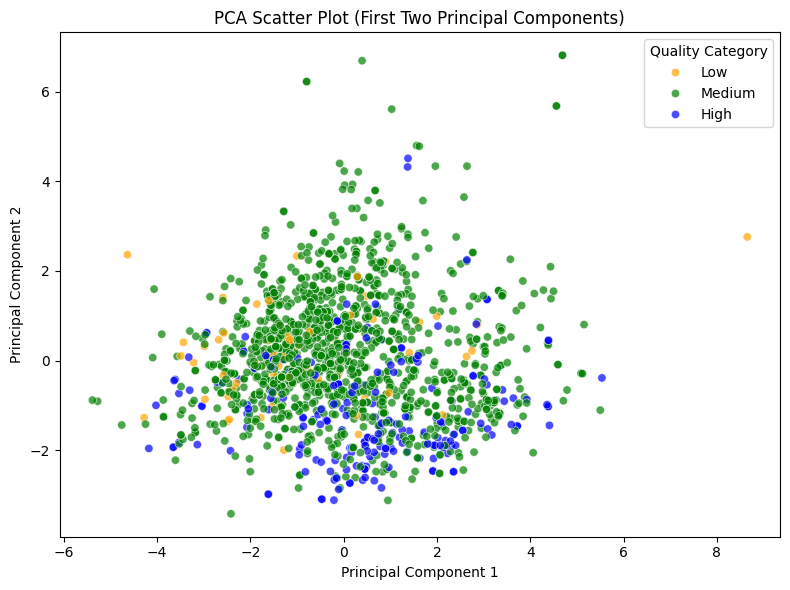

In [30]:
# Visualization for PCA results

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='quality_category',
                palette={'Low': 'orange', 'Medium': 'green', 'High': 'blue'}, alpha=0.7)
plt.title('PCA Scatter Plot (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality Category')
plt.tight_layout()
plt.show(0)

In [32]:
#classification using Logistic Regression on PCA components
data['quality_cat'] = pd.cut(data['quality'], bins=bins, labels=labels)
y_cat = data['quality_cat']

In [35]:
#fit logistic regression model on original standardized data

clf = LogisticRegression(max_iter=1000)
score_orig = cross_val_score(clf, X_scaled, y_cat, cv=5, scoring='accuracy').mean()


In [36]:
# Fit logistic regression on first num_components_90 principal components
pca_for_clf = PCA(n_components=num_components_90)
X_pca = pca_for_clf.fit_transform(X_scaled)
score_pca = cross_val_score(clf, X_pca, y_cat, cv=5, scoring='accuracy').mean()

print(f'Accuracy using original features: {score_orig:.4f}')
print(f'Accuracy using PCA with {num_components_90} components: {score_pca:.4f}')

Accuracy using original features: 0.8299
Accuracy using PCA with 7 components: 0.8268
